<a href="https://colab.research.google.com/github/nguyencong1227/Neural-networks-and-deep-learning/blob/main/sentiment_analysis_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/data/IMDB Dataset.csv' )

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df["encoder_sentiment"] = pd.get_dummies(df['sentiment'])['positive']
df.head()

,review,sentiment,encoder_sentiment
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [ ]:
# df["sentiment"] = df["sentiment"].astype('category')
# df.dtypes

In [ ]:
# df["encoder_sentiment"] = df["sentiment"].cat.codes
# df.head()

In [ ]:
df.isna().sum()

review               0
sentiment            0
encoder_sentiment    0
dtype: int64

In [ ]:
r,c = df.shape

X = df['review']
y = df['encoder_sentiment']
y = np.array(y)

In [ ]:
print(X[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [ ]:
print(r, c)

50000 3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)

(35000,) (15000,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)

X_seq_train = tokenizer.texts_to_sequences(X_train)
X_seq_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_seq_train[5])
print(tokenizer.sequences_to_texts([[1432, 47]]))
print(X_train[0])

[489, 2583, 449, 23, 1, 675, 12, 215, 5, 323, 50, 10, 101, 4, 1021, 1618, 9, 478, 51, 2583, 14, 1, 19, 269, 341, 2, 30, 27, 220, 4332, 68, 243, 10, 154, 525, 1, 2156, 129, 10, 13, 42, 5, 2495, 1, 656, 251, 45, 40, 86, 2, 48, 3, 27, 4, 1, 88, 2583, 2372, 134, 10, 25, 123, 107, 1, 658, 142, 25, 8031, 5, 24, 325, 2, 387, 59, 589, 25, 781, 20, 11, 2583, 1261, 9, 662, 41, 5, 2134, 93, 8, 1, 127, 18, 9, 13, 27, 1142, 1311, 139, 63, 11, 17]
['million some']
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald 

In [ ]:
for i in X_seq_train[0]:
   print(f"{i} -----> {tokenizer.index_word[i]}")

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max([len(t) for t in X_seq_train] + [len(t) for t in X_seq_test])
print(max_length)
X_pad_train = pad_sequences(sequences=X_seq_train, 
                              maxlen=max_length, 
                              padding='post')

print(X_pad_train.shape)

X_pad_test = pad_sequences(sequences=X_seq_test, 
                              maxlen=max_length,     
                              padding='post')
print(X_pad_test.shape)

2209
(35000, 2209)
(15000, 2209)


In [ ]:
X_pad_train[1]

array([11,  6, 27, ...,  0,  0,  0], dtype=int32)

In [ ]:
# ML: X_pad ->  sentiment
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Input, Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import RMSprop 

vocab_size = 10000
p = 0.3

inp = Input(shape=(max_length))
x = Embedding(vocab_size, 128, input_length=max_length)(inp)
x = Dropout(p)(x)
x = Conv1D(filters=32, kernel_size=3, 
           padding='same', activation='elu')(x)

x = Dropout(p)(x)
x = Conv1D(filters=16, kernel_size=3, 
           padding='same', activation='elu')(x)

# collect features: poolling??? -> inovations 
# dãn ma trận 59 x 16 -> 944-vector
#x = Flatten()(x)

# Trung bình hoá các feature của chuỗi
x = K.mean(x, keepdims=False, axis=1)

# Fully connected layer for classification
x = Dense(units=128, kernel_initializer='lecun_normal', activation='elu')(x)
x = Dropout(p)(x)
x = Dense(units=64, kernel_initializer='lecun_normal', activation='elu')(x)
x = Dropout(p)(x)
x = Dense(units=1, activation='sigmoid')(x) # xác suất để x là positive


model = Model(inputs=inp, outputs=x)
model.summary()

# compile model -> optimizer, loss, evaluation metrics
## optimizer = keras.optimizers.Adam(lr=0.01)
## model.compile(loss="binary_crossentropy", optimizer=optimizer , metrics=['acc'])
model.compile(loss="binary_crossentropy", optimizer = RMSprop() , metrics=['acc'])

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 2209)]            0         
                                                                 
 embedding_26 (Embedding)    (None, 2209, 128)         1280000   
                                                                 
 dropout_96 (Dropout)        (None, 2209, 128)         0         
                                                                 
 conv1d_52 (Conv1D)          (None, 2209, 32)          12320     
                                                                 
 dropout_97 (Dropout)        (None, 2209, 32)          0         
                                                                 
 conv1d_53 (Conv1D)          (None, 2209, 16)          1552      
                                                                 
 tf.math.reduce_mean_25 (TFO  (None, 16)               0  

In [ ]:
history = model.fit(X_pad_train, y_train, 
          epochs=10, batch_size=64,validation_data = (X_pad_test, y_test))

Epoch 1/10
547/547 [==============================] - 13s 24ms/step - loss: 0.1415 - acc: 0.9506 - val_loss: 0.2498 - val_acc: 0.9068
Epoch 2/10
547/547 [==============================] - 13s 24ms/step - loss: 0.1363 - acc: 0.9515 - val_loss: 0.2715 - val_acc: 0.8989
Epoch 3/10
547/547 [==============================] - 15s 27ms/step - loss: 0.1317 - acc: 0.9533 - val_loss: 0.2529 - val_acc: 0.9041
Epoch 4/10
547/547 [==============================] - 13s 24ms/step - loss: 0.1285 - acc: 0.9550 - val_loss: 0.2642 - val_acc: 0.8997
Epoch 5/10
547/547 [==============================] - 13s 24ms/step - loss: 0.1237 - acc: 0.9558 - val_loss: 0.2626 - val_acc: 0.9037
Epoch 6/10
547/547 [==============================] - 13s 24ms/step - loss: 0.1205 - acc: 0.9599 - val_loss: 0.2627 - val_acc: 0.9040
Epoch 7/10
547/547 [==============================] - 13s 24ms/step - loss: 0.1174 - acc: 0.9592 - val_loss: 0.2780 - val_acc: 0.9015
Epoch 8/10
547/547 [==============================] - 15s 27ms

In [ ]:
y_pred_test = model.predict(X_pad_test)
y_pred_test[y_pred_test >= 0.5] = 1
y_pred_test[y_pred_test < 0.5] = 0

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7500
           1       0.91      0.88      0.90      7500

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



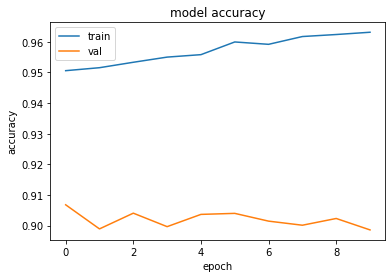

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()